In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import requests

In [3]:
def get_advs(url):
    r = requests.get(url)
    page = BeautifulSoup(r.text, 'html.parser')
    advs_page = page.find('div', {'class':"js-catalog_serp"}).find_all('div', {'class':'item_table'})
    return advs_page

In [4]:
def get_text(url):
    r = requests.get(url)
    page = BeautifulSoup(r.text, 'html.parser')
    text = page.find('div', {'class':"item-description-text"}).text.strip()
    return text

In [5]:
r = requests.get('https://www.avito.ru/perm/remont_i_stroitelstvo?q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0')
page = BeautifulSoup(r.text, 'html.parser')
advs_page = page.find('div', {'class':"js-catalog_serp"})

In [6]:
base_url = 'https://www.avito.ru/perm/remont_i_stroitelstvo'
req_str = '?q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0'
full_url = base_url + req_str
advs = get_advs(full_url)

In [7]:
len(advs)

52

Всего 52 объявление хотя на сайте их более 700. Это из-за разделения результата на страницы.
Получаем количество страниц

In [8]:
all_pages = page.find('div', {'class':"pagination-pages"}).find_all('a', {'class':'pagination-page'})

In [9]:
all_pages

[<a class="pagination-page" href="/perm/remont_i_stroitelstvo?q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0">1</a>,
 <a class="pagination-page" href="/perm/remont_i_stroitelstvo?p=2&amp;q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0">2</a>,
 <a class="pagination-page" href="/perm/remont_i_stroitelstvo?p=3&amp;q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0">3</a>,
 <a class="pagination-page" href="/perm/remont_i_stroitelstvo?p=4&amp;q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0">4</a>,
 <a class="pagination-page" href="/perm/remont_i_stroitelstvo?p=5&amp;q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%BE%D0%BC%D0%B0+%D0%B8%D0%B7+%D0%B1%D1%80%D0%B5%D0%B2%D0%BD%D0%B0">5</a>,
 <a class="pagination-page" href="/perm/remont_i_stroitelstvo?p=6&amp;q=%D1%81%D1%80%D1%83%D0%B1+%D0%B4%D0%B

По размер all_pages не всегда получим точный результат. Поэтому сплтим последнюю строку и получаем количество страниц

In [10]:
sum_pages = int(str(all_pages[-1]).split('?p=')[1].split('&amp')[0])

In [11]:
sum_pages

18

In [14]:
if sum_pages > 1:
    for p in range(2, sum_pages+1):
        p_url = '&p=' + str(p)
        full_url = base_url + req_str + p_url
        advs += get_advs(full_url)

In [15]:
len(advs)

752

Получаем номер объявления, описание, цена, дата, url
Доп. инфо: какое дерево  

In [37]:
title = advs[0].find('div', {'class':'description'}).find('h3').text.strip()

In [38]:
advs[0].find('a').get('href')

'/perm/remont_i_stroitelstvo/pilomaterialy._srub_1778786771'

In [272]:
price = advs[0].find('span', {'class':'snippet-price'}).text.strip()

In [324]:
advs[0].find('div', {'class':'data'}).find_all('p')[-1].text.strip()

'Компания'

In [297]:
advs[3].find('a').get('href').split('_')[-1]

'813686405'

In [18]:
advs_data = []
for adv in advs:
    try:
        id_adv = adv.find('a').get('href').split('_')[-1]
    except:
        id_adv = "None"
    try:
        price = adv.find('span', {'class':'snippet-price'}).text.strip()
    except:
        price = "None"
    try:
        title = adv.find('div', {'class':'description'}).find('h3').text.strip()
    except:
        title = "None"
    try:
        date = adv.find('div', {'class':'snippet-date-info'}).get('data-tooltip')
    except:
        date = "None"
    try:
        company = adv.find('div', {'class':'data'}).find_all('p')[-1].text.strip()
    except:
        company = "None"
    try:
        url_ad = 'https://www.avito.ru/' + adv.find('a').get('href')
    except:
        url_ad = 'None'
    try:
        text = get_text(url_ad)
    except:
        text = 'None'
    advs_data.append({
        'id': id_adv,
        'price': price,
        'title': title,
        'date': date,
        'company': company,
        'url': url_ad,
        'text': text
    })
df = pd.DataFrame(advs_data)
df.head()


In [10]:
df = pd.DataFrame(advs_data)
df.head()

,company,date,id,price,text,title,url
0,Компания,1 июня 17:49,1778786771,7 500 ₽,Пиломатериалы • Пиломатериал обрезной • Доска ...,Пиломатериалы. Сруб,https://www.avito.ru//perm/remont_i_stroitelst...
1,None,1 июня 10:54,935168372,2 500 ₽,Срубы напрямую от производителя БЕЗ ПОСРЕДНИКО...,Срубы дома из бревна и бруса,https://www.avito.ru//perm/remont_i_stroitelst...
2,"Срубы, дома, пиломатериалы",31 мая 13:32,1878688930,9 000 ₽,None,Сруб дома оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...
3,"Срубы, дома, пиломатериалы",25 мая 10:53,1910103946,195 200 ₽,Сруб • оцилиндрованное бревно • Сруб для дома☆...,Сруб дома. Оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...
4,"Срубы, дома, пиломатериалы",22 мая 19:40,1910917118,245 000 ₽,Сруб • оцилиндрованное бревноСруб дома • Сруб ...,Сруб дома. Оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...


In [12]:
df = df[df['price'].str.contains('₽')]

In [13]:
df['price'] = df['price'].str.replace(' ','').str.replace('₽','').astype(int)

In [14]:
df.head()

,company,date,id,price,text,title,url
0,Компания,1 июня 17:49,1778786771,7500,Пиломатериалы • Пиломатериал обрезной • Доска ...,Пиломатериалы. Сруб,https://www.avito.ru//perm/remont_i_stroitelst...
1,None,1 июня 10:54,935168372,2500,Срубы напрямую от производителя БЕЗ ПОСРЕДНИКО...,Срубы дома из бревна и бруса,https://www.avito.ru//perm/remont_i_stroitelst...
2,"Срубы, дома, пиломатериалы",31 мая 13:32,1878688930,9000,None,Сруб дома оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...
3,"Срубы, дома, пиломатериалы",25 мая 10:53,1910103946,195200,Сруб • оцилиндрованное бревно • Сруб для дома☆...,Сруб дома. Оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...
4,"Срубы, дома, пиломатериалы",22 мая 19:40,1910917118,245000,Сруб • оцилиндрованное бревноСруб дома • Сруб ...,Сруб дома. Оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...


In [15]:
new_df = df

In [17]:
new_df.drop_duplicates(subset='id', keep=False, inplace=True)

In [21]:
new_df.head()

,company,date,id,price,text,title,url
0,Компания,1 июня 17:49,1778786771,7500,Пиломатериалы • Пиломатериал обрезной • Доска ...,Пиломатериалы. Сруб,https://www.avito.ru//perm/remont_i_stroitelst...
1,None,1 июня 10:54,935168372,2500,Срубы напрямую от производителя БЕЗ ПОСРЕДНИКО...,Срубы дома из бревна и бруса,https://www.avito.ru//perm/remont_i_stroitelst...
2,"Срубы, дома, пиломатериалы",31 мая 13:32,1878688930,9000,None,Сруб дома оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...
3,"Срубы, дома, пиломатериалы",25 мая 10:53,1910103946,195200,Сруб • оцилиндрованное бревно • Сруб для дома☆...,Сруб дома. Оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...
4,"Срубы, дома, пиломатериалы",22 мая 19:40,1910917118,245000,Сруб • оцилиндрованное бревноСруб дома • Сруб ...,Сруб дома. Оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...


In [22]:
new_df['text'] = new_df['text'].str.lower()

In [23]:
new_df['title'] = new_df['title'].str.lower()

In [24]:
new_df['winter'] = new_df['text'].str.contains('зим')

In [25]:
new_df[new_df['winter'] == True]

,company,date,id,price,text,title,url,winter
3,"Срубы, дома, пиломатериалы",25 мая 10:53,1910103946,195200,сруб • оцилиндрованное бревно • сруб для дома☆...,сруб дома. оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,True
5,Компания,31 мая 08:43,1063273031,609000,"зимний лес, 22см, проект реализован дважды. в ...",сруб дома из оцилиндрованного бревна 1 этаж 86м2,https://www.avito.ru//perm/remont_i_stroitelst...,True
7,"Срубы, дома, пиломатериалы",25 мая 10:52,1910357871,137200,сруб • оцилиндрованное бревно • сруб для дома ...,сруб дома / бани. оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,True
9,"Срубы, дома, пиломатериалы",11 мая 19:24,1846519956,8500,срубсруб дома от 150 м2 из оцилиндрованного бр...,сруб дома / оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,True
12,None,16 мая 15:57,1585381765,207816,продаём срубы домов из цельного ошкуренного бр...,"срубы домов от 6х9 до 10х12, цельное бревно",https://www.avito.ru//perm/remont_i_stroitelst...,True
14,Компания,13 мая 09:44,811143061,9000,сруб дома 7x8м оцилиндрованное бревно 24смиспо...,сруб дома 7x8м оцилиндрованное бревно 24см,https://www.avito.ru//perm/remont_i_stroitelst...,True
24,None,,1367877452,10000,"срубы, дома из бруса.- рубка возможна в лапу и...",срубы дома из оц.бревна и бруса,https://www.avito.ru//perm/remont_i_stroitelst...,True
27,None,,1611608212,8500,сруб 3.5х3 цена 35.000собственное производство...,"сруб.баня, дом(бревно брус под ключ)",https://www.avito.ru//perm/remont_i_stroitelst...,True
31,Компания,22 мая 10:17,815477169,9600,сруб дома 9x9м оцилиндрованное бревно 30 см.из...,сруб дома 9x9м оцилиндрованное бревно 30см,https://www.avito.ru//perm/remont_i_stroitelst...,True
52,"Срубы, дома, пиломатериалы",11 мая 15:50,1878681458,118000,сруб • сруб для дома из бревна сруб дома от 48...,сруб дома,https://www.avito.ru//perm/remont_i_stroitelst...,True


In [26]:
new_df.shape

(385, 8)

In [319]:
np.array(df[df['text'].str.contains('канад') == True])

array([['1585381765', 207816,
        'срубы домов от 6х9 до 10х12, цельное бревно', '16 мая 15:57',
        'None',
        'https://www.avito.ru//perm/remont_i_stroitelstvo/sruby_domov_ot_6h9_do_10h12_tselnoe_brevno_1585381765',
        'Продаём срубы домов из цельного ошкуренного бревна длиной до 10 метров. Это именно цельные 10-метровые брёвна, не стыкованные. Диаметры от 24 до 28 см.Возможны размеры 6х9, 6х10, 9х9, 9х10, 9х12, 10х10, 10х12. Можем сразу выполнить проёмы для экономии.Можем построгать рубанком для более чистого внешнего вида.Можем срубить сейчас, чтобы зимой или на следующий год построить уже сухой дом - хранение на площадке бесплатно.Рубим в чашу и в лапу, есть элитная канадская рубка.Лес северный, из Коми округа (Кудымкар).Зальём фундамент - столбики, лента, плита.Построим под крышу и под ключ.Доставка по России.Звоните без выходных с 9 до 21:00.']],
      dtype=object)

In [27]:
new_df = new_df[new_df['title'].str.contains('беседк') == False ]
new_df = new_df[new_df['title'].str.contains('баня') == False ]
new_df = new_df[new_df['title'].str.contains('бани') == False ]
new_df = new_df[new_df['title'].str.contains('банн') == False ]
new_df = new_df[new_df['title'].str.contains('3х') == False ]

In [28]:
new_df.shape

(204, 8)

In [178]:
new_df[new_df['title'].str.contains('дом') == False ]

,id,price,title,date,company,url,text,winter
0,1778786771,7500,пиломатериалы. сруб,1 июня 17:49,Компания,https://www.avito.ru//perm/remont_i_stroitelst...,Пиломатериалы • Пиломатериал обрезной • Доска ...,False
55,1910596777,181600,сруб 6х7. оцилиндрованное бревно,8 мая 09:28,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,Сруб дома. Сруб из оцилиндрованного бревна Сру...,False
64,1261481250,35000,"сруб брус,бревно(конопатка,отделка,шлифовка)",11 мая 08:24,None,https://www.avito.ru//perm/remont_i_stroitelst...,Срубы от 31000рМонтаж бруса от 2500рМы предост...,False
65,1878505646,9000,сруб из оцилиндрованного бревна,12 мая 21:39,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,None,False
71,1846148693,9000,сруб оцилиндрованное бревно,10 мая 18:25,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,Сруб бани из оцилиндрованного бревна. Рубка уг...,False
79,1910398859,340000,сруб / оцилиндрованное бревно,13 мая 10:07,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,• СРУБ• Сруб для дома • Сруб бани • Сруб дома ...,False
90,1846771806,9000,сруб оцилиндрованное бревно,13 мая 10:53,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,None,False
111,1878021313,83200,сруб оцилиндрованное бревно,15 мая 13:56,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,Сруб оцилиндрованное бревноСруб бани 3 х 5 и 3...,True
116,1846885395,8890,сруб. оцилиндрованное бревно,17 мая 14:44,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,Сруб из оцилиндрованного бревна. Цена указана ...,True
128,1878298951,221200,сруб оцилиндрованный / оцилиндрованное бревно,23 мая 11:32,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,Оцилиндрованное бревно • Сруб бани• Сруб дома ...,False


In [29]:
new_df[new_df['winter'] == True].shape

(37, 8)

In [30]:
import numpy as np

In [31]:
new_df[new_df['text'].str.contains('обычный') == True ].shape

(2, 8)

In [163]:
new_df['ocilin'] = new_df['text'].str.contains('оцилиндрован') | new_df['title'].str.contains('оцилиндрован')

In [164]:
new_df['profil'] = new_df['text'].str.contains('профилирован') | new_df['title'].str.contains('профилирован')

In [165]:
new_df['hand'] = new_df['text'].str.contains('ручной рубки') | new_df['title'].str.contains('ручной рубки')

In [166]:
new_df['simple'] = new_df['text'].str.contains('брус обычный') | new_df['title'].str.contains('брус обычный')

In [36]:
cat_feat = ['winter', 'ocilin', 'profil', 'hand', 'simple']

In [21]:
%pylab inline

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import os
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import plotly.graph_objs as go

#многопоточность если потребуется
from multiprocessing import Pool , Process
from multiprocessing import Manager

Populating the interactive namespace from numpy and matplotlib


C:\Users\sypachev\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter


from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import VotingClassifier as vc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier as sgd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import Lasso as las
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

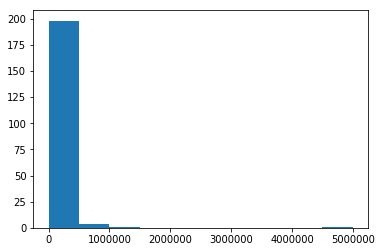

In [40]:
plt.hist(new_df['price'])
plt.show()

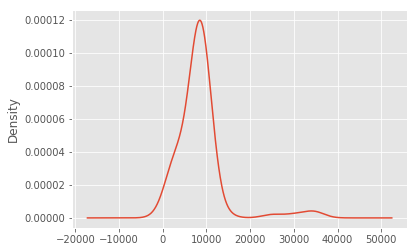

In [53]:
matplotlib.style.use('ggplot')
s = new_df[new_df['price'] < 50000]['price']
s.plot.kde()

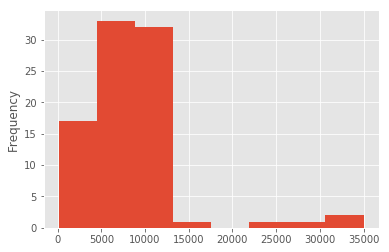

In [66]:
s.plot.hist(bins=8)

In [45]:
new_df[new_df['price'] < 10000 ]

,company,date,id,price,text,title,url,winter,ocilin,profil,hand,simple
0,Компания,1 июня 17:49,1778786771,7500,пиломатериалы • пиломатериал обрезной • доска ...,пиломатериалы. сруб,https://www.avito.ru//perm/remont_i_stroitelst...,False,True,True,True,False
1,None,1 июня 10:54,935168372,2500,срубы напрямую от производителя без посреднико...,срубы дома из бревна и бруса,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False
2,"Срубы, дома, пиломатериалы",31 мая 13:32,1878688930,9000,none,сруб дома оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False
8,"Срубы, дома, пиломатериалы",8 мая 09:11,1910378619,9000,none,сруб дома/оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False
9,"Срубы, дома, пиломатериалы",11 мая 19:24,1846519956,8500,срубсруб дома от 150 м2 из оцилиндрованного бр...,сруб дома / оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,True,True,False,False,False
11,None,,1700777462,3000,"дом из бревна , баня. срубы напрямую от произв...",срубы дома из бревна и бруса,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False
13,"Срубы, дома, пиломатериалы",9 мая 11:28,1846133804,8500,none,сруб дома из оцилиндрованного бревна,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False
14,Компания,13 мая 09:44,811143061,9000,сруб дома 7x8м оцилиндрованное бревно 24смиспо...,сруб дома 7x8м оцилиндрованное бревно 24см,https://www.avito.ru//perm/remont_i_stroitelst...,True,True,False,False,False
16,"Срубы, дома, пиломатериалы",19 мая 00:04,1846485360,8500,none,сруб дома из оцилиндрованного бревна,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False
17,"Срубы, дома, пиломатериалы",7 мая 08:59,1878083691,8820,none,сруб дома/сруб из оцилиндрованного бревна,https://www.avito.ru//perm/remont_i_stroitelst...,False,False,False,False,False


In [77]:
osc_df = new_df[(new_df['ocilin'] == True) & (new_df['hand'] == False) & (new_df['profil'] == False) & (new_df['simple'] == False)]
prof_df = new_df[(new_df['ocilin'] == False) & (new_df['hand'] == False) & (new_df['profil'] == True) & (new_df['simple'] == False)]
hand_df = new_df[(new_df['ocilin'] == False) & (new_df['hand'] == True) & (new_df['profil'] == False) & (new_df['simple'] == False)]
simple_df = new_df[(new_df['ocilin'] == False) & (new_df['hand'] == False) & (new_df['profil'] == False) & (new_df['simple'] == True)]
fls_df = new_df[(new_df['ocilin'] == False) & (new_df['hand'] == False) & (new_df['profil'] == False) & (new_df['simple'] == False)]

In [78]:
res_df = pd.concat([osc_df, prof_df, hand_df, simple_df, fls_df])

In [79]:
res_df.shape

(157, 12)

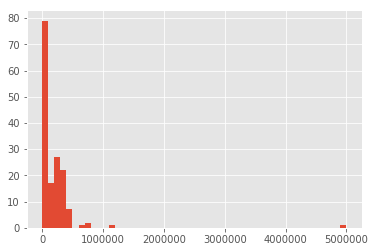

In [87]:
plt.hist(res_df['price'], bins = 50)
plt.show()

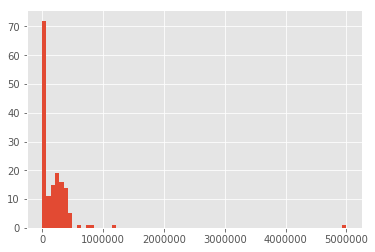

In [84]:
plt.hist(res_df['price'], bins=70)
plt.show()

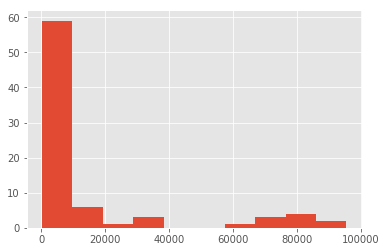

In [86]:
plt.hist(res_df[res_df['price'] < 100000]['price'])
plt.show()

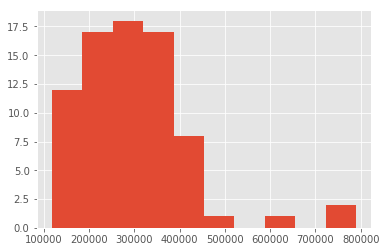

In [82]:
plt.hist(res_df[(res_df['price'] > 100000) &
                (res_df['price'] < 1000000)]['price'])
plt.show()

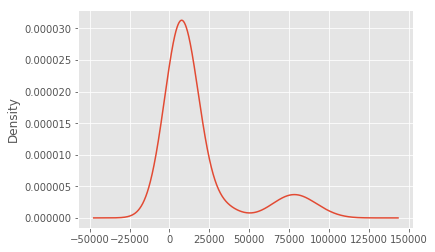

In [89]:
matplotlib.style.use('ggplot')
s = res_df[res_df['price'] < 100000]['price']
s.plot.kde()

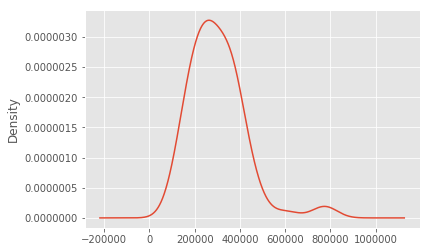

In [91]:
matplotlib.style.use('ggplot')
s = res_df[(res_df['price'] > 100000) &
           (res_df['price'] < 1000000)]['price']
s.plot.kde()

In [278]:
res_df = res_df[res_df['price'] > 100000]

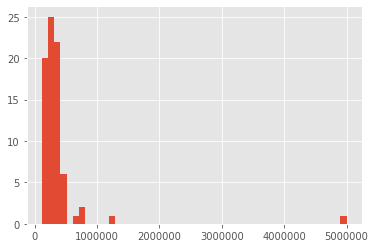

In [279]:
plt.hist(res_df['price'], bins = 50)
plt.show()

In [280]:
res_df = new_df[new_df['price'] < 1000000]

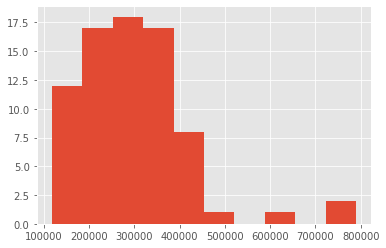

In [282]:
plt.hist(res_df['price'])
plt.show()

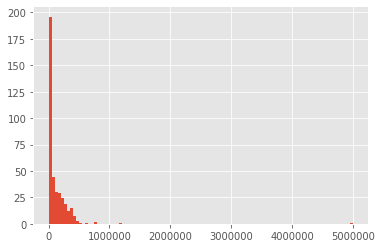

In [289]:
plt.hist(df['price'], bins = 100)
plt.show()

In [290]:
import seaborn as sns

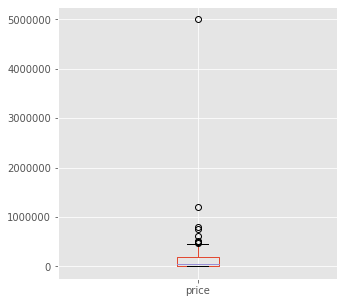

In [320]:
df.boxplot(column='price', figsize=(5,5))

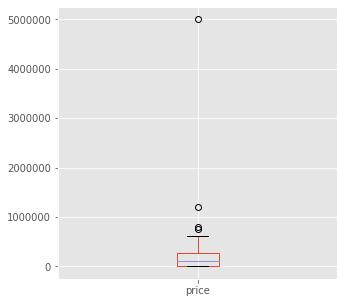

In [323]:
new_df.boxplot(column='price', figsize=(5,5))

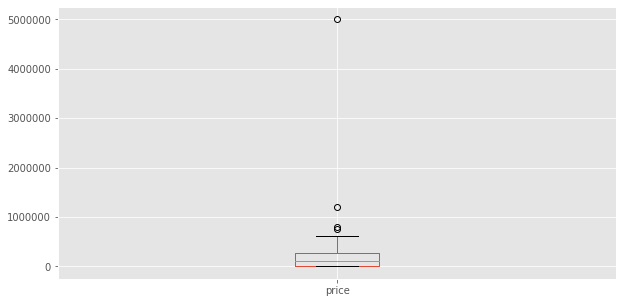

In [324]:
new_df.boxplot(column='price', figsize=(10,5))

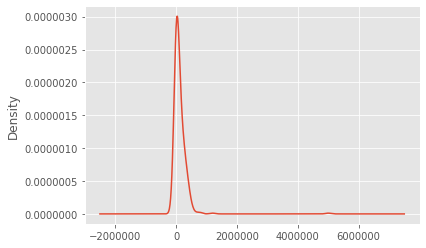

In [295]:
matplotlib.style.use('ggplot')
s = df['price']
s.plot.kde()

In [96]:
big_df = res_df[(res_df['price'] > 100000) &
           (res_df['price'] < 1000000)]

In [93]:
lit_df = res_df[res_df['price'] < 25000]

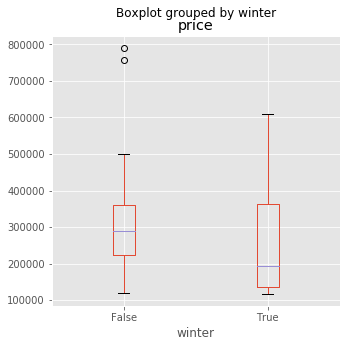

In [125]:
big_df.boxplot(column='price', by='winter', figsize=(5,5))

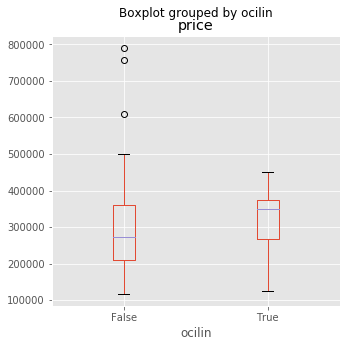

In [126]:
big_df.boxplot(column='price', by='ocilin', figsize=(5,5))

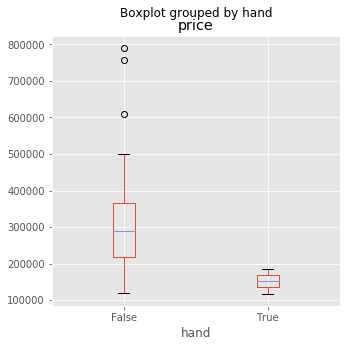

In [127]:
big_df.boxplot(column='price', by='hand', figsize=(5,5))

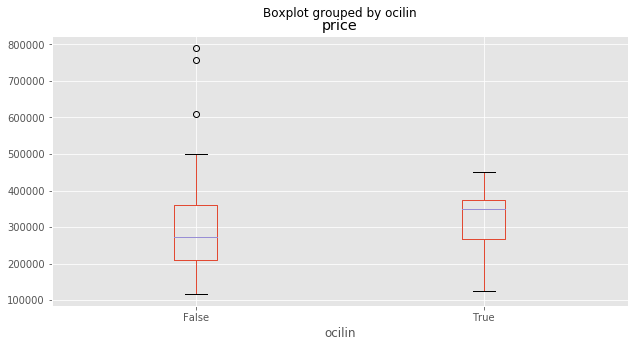

In [300]:
res_df.boxplot(column='price', by='ocilin', figsize=(10,5))

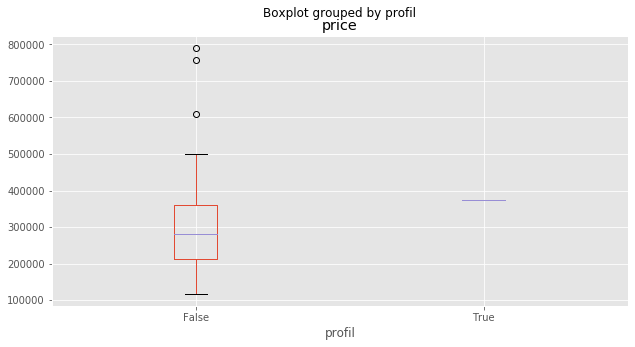

In [303]:
res_df.boxplot(column='price', by='profil', figsize=(10,5))

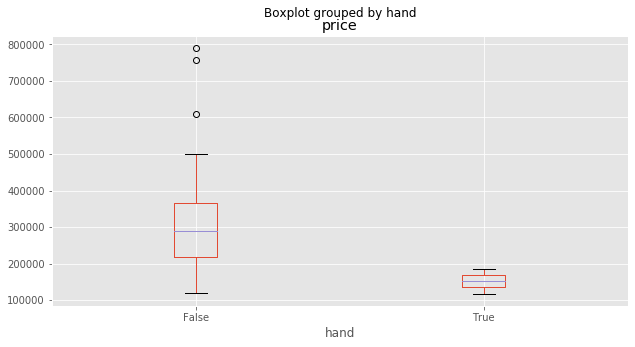

In [304]:
res_df.boxplot(column='price', by='hand', figsize=(10,5))

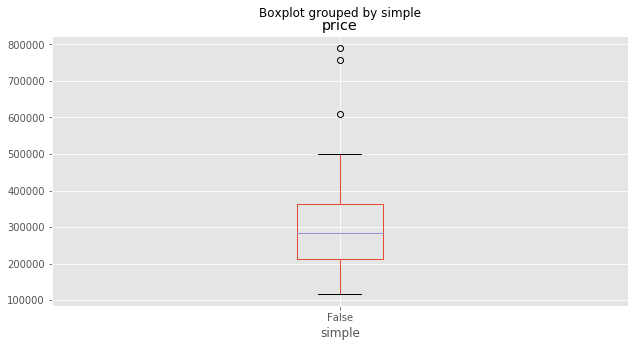

In [305]:
res_df.boxplot(column='price', by='simple', figsize=(10,5))

In [309]:
res_df[res_df['profil'] == False]

,id,price,title,date,company,url,text,winter,ocilin,profil,hand,simple,kolib
39,1567615782,125000,"дом из бревна, бруса 6х6",,None,https://www.avito.ru//perm/remont_i_stroitelst...,сруб из бревна 6х6 125000предлагаем услуги:1. ...,False,True,False,False,False,False
55,1910596777,181600,сруб 6х7. оцилиндрованное бревно,8 мая 09:28,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,сруб дома. сруб из оцилиндрованного бревна сру...,True,True,False,False,False,False
75,1909999433,290000,сруб дома. строительство. проекты,15 мая 14:08,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,сруб дома. сруб для дома. оцилиндрованное брев...,False,True,False,False,False,False
263,1878065633,350000,"дом из бруса, бревна",16 мая 08:36,None,https://www.avito.ru//perm/remont_i_stroitelst...,дачный дом 6х6 из бруса под усадку 350 000 руб...,False,True,False,False,False,False
268,1878551468,245000,сруб оцилиндрованный,30 мая 14:48,"Срубы, дома, пиломатериалы",https://www.avito.ru//perm/remont_i_stroitelst...,сруб дома из оцилиндрованного бревна. рубка уг...,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1922589102,240000,дом из бруса,25 мая 14:58,Компания,https://www.avito.ru//perm/remont_i_stroitelst...,none,False,False,False,False,False,False
299,1922347992,120000,дом из бруса,25 мая 12:11,Компания,https://www.avito.ru//perm/remont_i_stroitelst...,none,False,False,False,False,False,False
351,1813415917,500000,сруб оцилиндровки,,None,https://www.avito.ru//perm/remont_i_stroitelst...,none,False,False,False,False,False,False
442,1455175730,350000,"дом 6х6(сборка, отделка,шлифовка)",,None,https://www.avito.ru//perm/remont_i_stroitelst...,дома из бруса бревна под крышу(под ключ). мате...,False,False,False,False,False,False


In [128]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [132]:
cat_feat = ['winter', 'ocilin', 'hand']

In [146]:
model_new = LinearRegression().fit(lit_df[cat_feat], lit_df['price'])
model_new

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
r2_score(lit_df['price'], model_new.predict(lit_df[cat_feat]))

0.044119454237543376

In [148]:
coef = pd.DataFrame()
coef['coef'] = model_new.coef_
coef['name'] = cat_feat
coef

,coef,name
0,1231.899479,winter
1,543.956069,ocilin


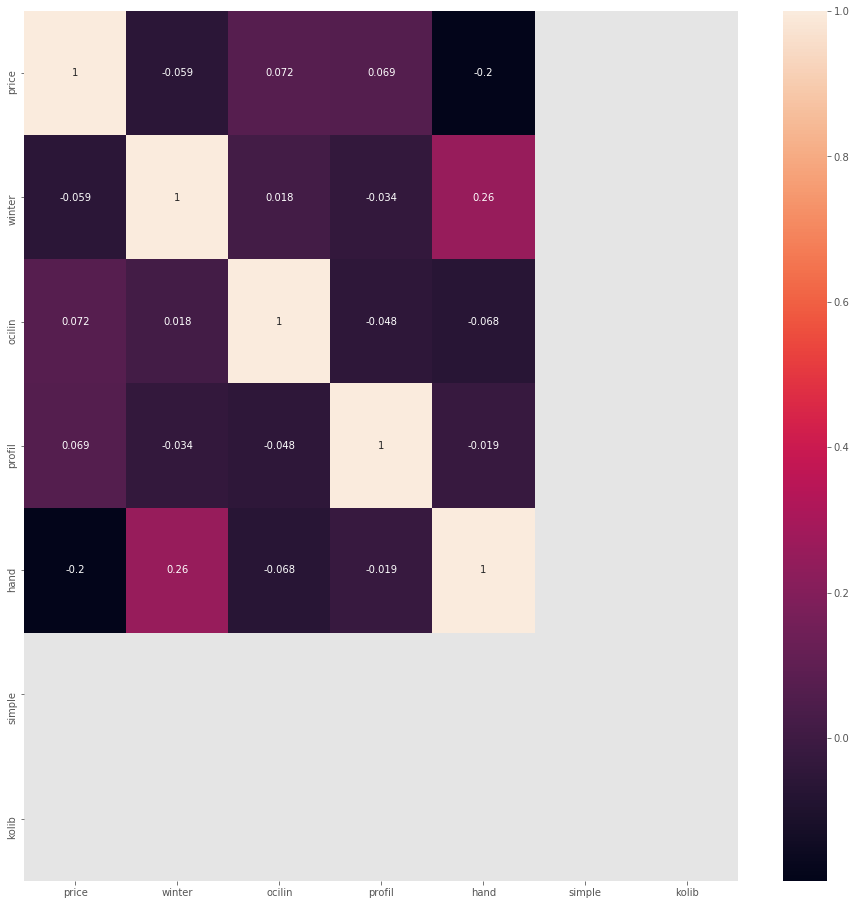

In [325]:
plt.figure(figsize=(16,16))
sns.heatmap(res_df.corr(), annot = True,)

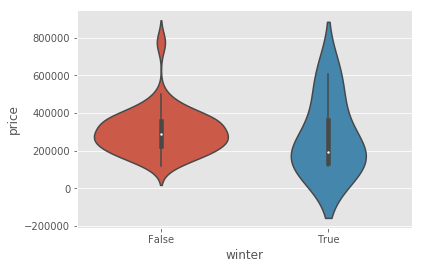

In [97]:
sns.violinplot(x='winter', y='price', data=big_df)

In [98]:
big_df

,company,date,id,price,text,title,url,winter,ocilin,profil,hand,simple
39,None,,1567615782,125000,сруб из бревна 6х6 125000предлагаем услуги:1. ...,"дом из бревна, бруса 6х6",https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
55,"Срубы, дома, пиломатериалы",8 мая 09:28,1910596777,181600,сруб дома. сруб из оцилиндрованного бревна сру...,сруб 6х7. оцилиндрованное бревно,https://www.avito.ru//perm/remont_i_stroitelst...,True,True,False,False,False
75,"Срубы, дома, пиломатериалы",15 мая 14:08,1909999433,290000,сруб дома. сруб для дома. оцилиндрованное брев...,сруб дома. строительство. проекты,https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
263,None,16 мая 08:36,1878065633,350000,дачный дом 6х6 из бруса под усадку 350 000 руб...,"дом из бруса, бревна",https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
268,"Срубы, дома, пиломатериалы",30 мая 14:48,1878551468,245000,сруб дома из оцилиндрованного бревна. рубка уг...,сруб оцилиндрованный,https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
374,None,21 мая 12:54,1846034174,450000,дачный дом из бруса 6х6 под усадку 350 000 ру...,дом брус 6\9,https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
407,None,,964389319,350000,брус дом (дачный)предлагаем услуги:1. строител...,дом из бруса 6х6,https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
432,None,15 мая 09:25,1846605880,350000,дачный дом из бруса от4500 за м2предлагаем усл...,"дом 72м2 (фундамент, стены кровля)",https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
459,None,7 мая 13:09,1846170440,400000,дачный дом из бруса под усадку 400 000 рублей....,дом брус 6\8,https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False
496,None,7 мая 13:09,1626715427,450000,дом из бруса 9х6 450 000предлагаем услуги:1. с...,сруб из бруса 6х9 (отделка кровля фундаменты),https://www.avito.ru//perm/remont_i_stroitelst...,False,True,False,False,False


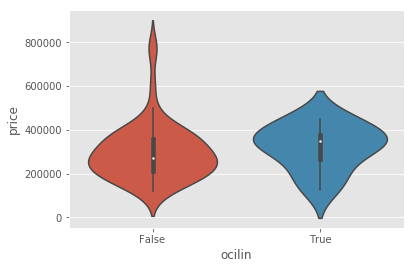

In [99]:
sns.violinplot(x='ocilin', y='price', data=big_df)

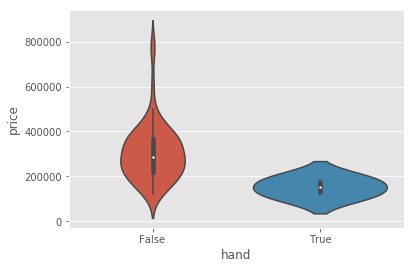

In [100]:
sns.violinplot(x='hand', y='price', data=big_df)

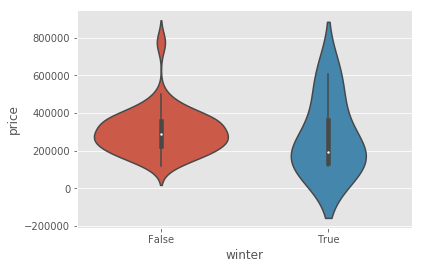

In [101]:
sns.violinplot(x='winter', y='price', data=big_df)

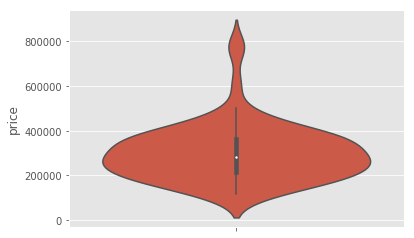

In [102]:
sns.violinplot(y='price', data=big_df)

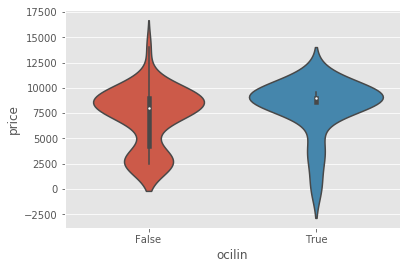

In [103]:
sns.violinplot(x='ocilin', y='price', data=lit_df)

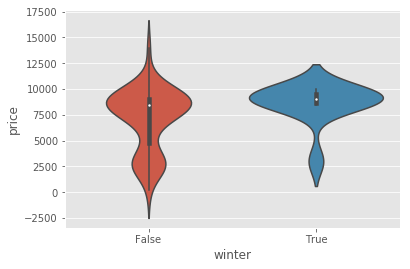

In [104]:
sns.violinplot(x='winter', y='price', data=lit_df)

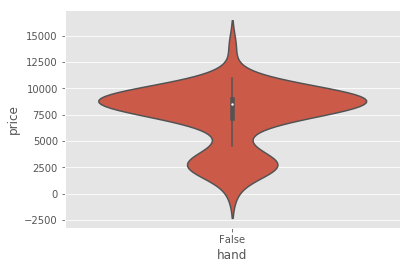

In [111]:
sns.violinplot(x='hand', y='price', data=lit_df)

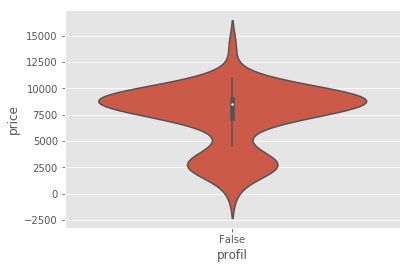

In [119]:
sns.violinplot(x='profil', y='price', data=lit_df)

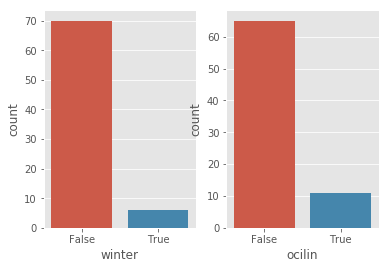

In [122]:
fig, ax =plt.subplots(1,2)
sns.countplot(big_df['winter'], ax=ax[0])
sns.countplot(big_df['ocilin'], ax=ax[1])
fig.show()

In [124]:
big_df.corr()

,price,winter,ocilin,profil,hand,simple
price,1.000000,-0.059086,0.071507,0.069489,-0.196576,NaN
winter,-0.059086,1.000000,0.018248,-0.033806,0.256699,NaN
ocilin,0.071507,0.018248,1.000000,-0.047502,-0.067630,NaN
profil,0.069489,-0.033806,-0.047502,1.000000,-0.018983,NaN
hand,-0.196576,0.256699,-0.067630,-0.018983,1.000000,NaN
simple,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
len(np.array(new_df[(new_df['ocilin'] == False) &
       (new_df['hand'] == False) &
       (new_df['simple'] == False) &
       (new_df['profil'] == False)]))

104

In [172]:
big_df.shape

(76, 12)